In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

In [3]:
CONVERTED_DATABASE_NAME = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'

In [19]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frames_df = pd.read_sql_query("select * from summed_frames where retention_time_secs >= 1000 and retention_time_secs <= 1120 order by scan ASC", db_conn)
db_conn.close()

In [20]:
frames_df.frame_id.min()

424

In [21]:
frames_df.frame_id.max()

475

In [22]:
frame_id = 450

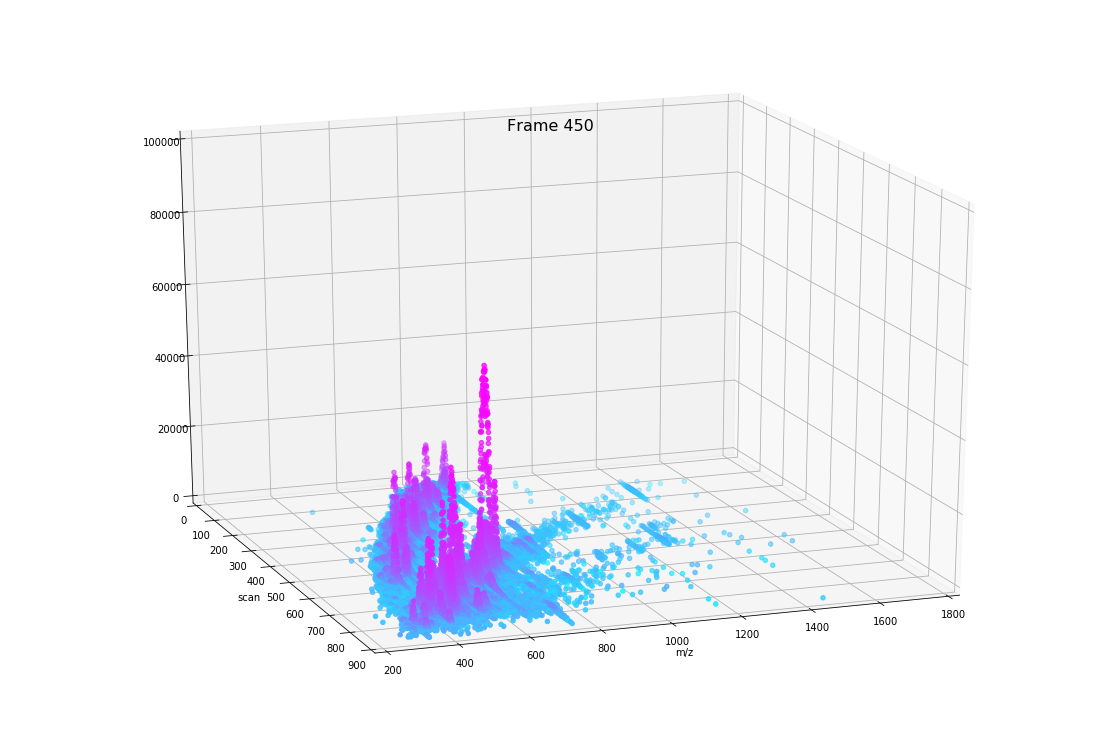

In [31]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

ax = Axes3D(fig)

ax.elev = 20.0
ax.azim = 250.0
ax.dist = 10.0

plt.gca().invert_yaxis()
plt.xlabel('m/z')
plt.ylabel('scan')

ax.set_xlim(left=200, right=1800)
ax.set_ylim(bottom=900, top=0)
ax.set_zlim(bottom=0, top=120000)

frame_df = frames_df[frames_df.frame_id==frame_id]
ax.scatter(frame_df.mz, frame_df.scan, frame_df.intensity, c=np.log(frame_df.intensity), cmap='cool')
fig.suptitle('Frame {}'.format(frame_id), fontsize=16, x=0.5, y=0.85)
plt.show()